In [10]:
import pandas as pd
import os
os.getcwd()
os.chdir("F:\\CDAC\\FINAL_PROJECT")

In [11]:
df=pd.read_csv("Main.csv")

In [12]:
df.head()

,X_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,X_PSU,CTELENM1,...,X_RFPSA23,X_CLNSCPY,X_SGMSCPY,X_SGMS10Y,X_RFBLDS4,X_STOLDNA,X_VIRCOLN,X_SBONTIM,X_CRCREC1,X_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [13]:
df.shape

(401958, 279)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,plot_roc_curve,plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier  

In [15]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier  

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)

In [17]:
df.columns

Index(['X_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', 'X_PSU', 'CTELENM1',
       ...
       'X_RFPSA23', 'X_CLNSCPY', 'X_SGMSCPY', 'X_SGMS10Y', 'X_RFBLDS4',
       'X_STOLDNA', 'X_VIRCOLN', 'X_SBONTIM', 'X_CRCREC1', 'X_AIDTST4'],
      dtype='object', length=279)

In [18]:
df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 279 columns):
 #    Column     Dtype  
---   ------     -----  
 0    X_STATE    int64  
 1    FMONTH     int64  
 2    IDATE      int64  
 3    IMONTH     int64  
 4    IDAY       int64  
 5    IYEAR      int64  
 6    DISPCODE   int64  
 7    SEQNO      int64  
 8    X_PSU      int64  
 9    CTELENM1   float64
 10   PVTRESD1   float64
 11   COLGHOUS   float64
 12   STATERE1   float64
 13   CELPHONE   float64
 14   LADULT1    float64
 15   COLGSEX    float64
 16   NUMADULT   float64
 17   LANDSEX    float64
 18   NUMMEN     float64
 19   NUMWOMEN   float64
 20   RESPSLCT   float64
 21   SAFETIME   float64
 22   CTELNUM1   float64
 23   CELLFON5   float64
 24   CADULT1    float64
 25   CELLSEX    float64
 26   PVTRESD3   float64
 27   CCLGHOUS   float64
 28   CSTATE1    float64
 29   LANDLINE   float64
 30   HHADULT    float64
 31   SEXVAR     int64  
 32   GENHLTH    float64
 33   PHYSHLT

In [19]:
df.isnull().sum()

X_STATE           0
FMONTH            0
IDATE             0
IMONTH            0
IDAY              0
IYEAR             0
DISPCODE          0
SEQNO             0
X_PSU             0
CTELENM1     277207
PVTRESD1     277207
COLGHOUS     401935
STATERE1     277207
CELPHONE     277207
LADULT1      277207
COLGSEX      401935
NUMADULT     277216
LANDSEX      350509
NUMMEN       291536
NUMWOMEN     291536
RESPSLCT     354532
SAFETIME     124751
CTELNUM1     124751
CELLFON5     124751
CADULT1      124755
CELLSEX      124771
PVTRESD3     124752
CCLGHOUS     400979
CSTATE1      124758
LANDLINE     124752
HHADULT      124753
SEXVAR            0
GENHLTH           8
PHYSHLTH          5
MENTHLTH          5
POORHLTH     200343
HLTHPLN1          3
PERSDOC2          3
MEDCOST           3
CHECKUP1          5
EXERANY2          3
SLEPTIM1          3
CVDINFR4          6
CVDCRHD4          3
CVDSTRK3          3
ASTHMA3           3
ASTHNOW      347817
CHCSCNCR          3
CHCOCNCR          3
CHCCOPD2          5


#Removing data which is having more than 60% null values

In [20]:
list1=[]
list=df.columns
for i in list:
  j=round(100*(df[i].isnull().sum()/len(df[i].index)),2)
  if j < 60.00:
    list1.append(i)

print(len(list1))

155


In [21]:
new_df=df[list1]

In [22]:
new_df.head()

,X_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,X_PSU,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,SEATBELT,DRNKDRI2,HADMAM,HADPAP2,LASTPAP2,HPVTEST,HADHYST2,COLNSCPY,COLNTEST,SIGMSCPY,BLDSTOL1,STOOLDNA,VIRCOLON,HIVTST7,HIVRISK5,PDIABTST,PREDIAB1,ECIGARET,TRNSGNDR,QSTVER,QSTLANG,X_METSTAT,X_URBSTAT,X_STSTR,X_STRWT,X_RAWRAKE,X_WT2RAKE,X_IMPRACE,X_CHISPNC,X_DUALUSE,X_DUALCOR,X_LLCPWT2,X_LLCPWT,X_RFHLTH,X_PHYS14D,X_MENT14D,X_HCVU651,X_TOTINDA,X_MICHD,X_LTASTH1,X_CASTHM1,X_ASTHMS1,X_DRDXAR2,X_EXTETH3,X_DENVST3,X_PRACE1,X_MRACE1,X_HISPANC,X_RACE,X_RACEG21,X_RACEGR3,X_RACEPRV,X_SEX,X_AGEG5YR,X_AGE65YR,X_AGE80,X_AGE_G,HTIN4,HTM4,WTKG3,X_BMI5,X_BMI5CAT,X_RFBMI5,X_CHLDCNT,X_EDUCAG,X_INCOMG,X_SMOKER3,X_RFSMOK3,DRNKANY5,DROCDY3_,X_RFBING5,X_DRNKWK1,X_RFDRHV7,X_RFSEAT2,X_RFSEAT3,X_DRNKDRV,X_RFMAM22,X_CLNSCPY,X_SGMSCPY,X_SGMS10Y,X_RFBLDS4,X_STOLDNA,X_VIRCOLN,X_SBONTIM,X_CRCREC1,X_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,2.0,4.0,88.0,1.0,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,1.0,NaN,1.0,1.0,4.0,2.0,1.0,1.0,4.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,NaN,1.0,NaN,10,1,1.0,1.0,11011,69.640207,1.0,69.640207,1,NaN,1,0.465411,460.002849,284.335672,1,2,3,2,1,2.0,2,2,1,1.0,2,1,1.0,1.0,2,1.0,1.0,1.0,1.0,2,8,1,56,5,67.0,170.0,4808.0,1660.0,1.0,1,1,4,1,1,2,2,0,1,0,1,1,1,9,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,3.0,6.0,1.0,1.0,2.0,7.0,88.0,99.0,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,10,1,1.0,1.0,11011,69.640207,1.0,69.640207,2,NaN,1,0.465411,460.002849,171.283329,1,1,1,9,1,2.0,2,1,2,1.0,2,1,2.0,2.0,2,2.0,2.0,2.0,2.0,2,10,2,65,6,64.0,163.0,7711.0,2918.0,3.0,2,1,4,9,9,9,9,900,9,99900,9,9,9,9,9.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,7.0,1.0,5.0,1.0,1.0,2.0,7.0,88.0,7.0,7777.0,508.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,888.0,NaN,NaN,NaN,1.0,102019.0,2.0,2.0,88.0,1.0,NaN,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN,10,1,1.0,1.0,11012,279.748901,1.0,279.748901,2,NaN,1,0.465411,1847.859106,1334.368863,1,1,1,9,1,2.0,1,1,3,1.0,9,1,2.0,2.0,2,2.0,2.0,2.0,2.0,2,10,2,65,6,68.0,173.0,NaN,NaN,NaN,9,1,3,5,4,1,2,0,1,0,1,1,1,9,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,88.0,88.0,NaN,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,7.0,1.0,3.0,4.0,1.0,9.0,2.0,5.0,88.0,99.0,9999.0,9999.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,1.0,NaN,2.0,1.0,7.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN,10,1,1.0,1.0,11011,69.640207,1.0,69.640207,1,NaN,9,NaN,1472.417322,1297.486618,1,1,1,9,2,2.0,1,1,3,2.0,2,9,1.0,1.0,2,1.0,1.0,1.0,1.0,2,13,2,80,6,NaN,NaN,NaN,NaN,NaN,9,1,2,9,4,1,2,0,1,0,1,1,1,9,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.

In [23]:
round(100*(new_df.isnull().sum()/len(new_df.index)),2)

X_STATE       0.00
FMONTH        0.00
IDATE         0.00
IMONTH        0.00
IDAY          0.00
IYEAR         0.00
DISPCODE      0.00
SEQNO         0.00
X_PSU         0.00
SAFETIME     31.04
CTELNUM1     31.04
CELLFON5     31.04
CADULT1      31.04
CELLSEX      31.04
PVTRESD3     31.04
CSTATE1      31.04
LANDLINE     31.04
HHADULT      31.04
SEXVAR        0.00
GENHLTH       0.00
PHYSHLTH      0.00
MENTHLTH      0.00
POORHLTH     49.84
HLTHPLN1      0.00
PERSDOC2      0.00
MEDCOST       0.00
CHECKUP1      0.00
EXERANY2      0.00
SLEPTIM1      0.00
CVDINFR4      0.00
CVDCRHD4      0.00
CVDSTRK3      0.00
ASTHMA3       0.00
CHCSCNCR      0.00
CHCOCNCR      0.00
CHCCOPD2      0.00
HAVARTH4      0.00
ADDEPEV3      0.00
CHCKDNY2      0.00
DIABETE4      0.00
LASTDEN4      0.00
RMVTETH4      0.00
MARITAL       0.00
EDUCA         0.00
RENTHOM1      0.00
CPDEMO1B      0.03
VETERAN3      0.33
EMPLOY1       0.73
CHILDREN      1.19
INCOME2       1.83
WEIGHT2       2.45
HEIGHT3       2.69
DEAF        

#Selecting columns based on meta data and which are realed to heart problem

In [24]:
new2_df = new_df[['X_MICHD','X_BMI5CAT','X_SMOKER3','CVDSTRK3','SEXVAR','CVDINFR4'
            ,'X_AGE_G','X_IMPRACE','EXERANY2','GENHLTH','ADDEPEV3','SLEPTIM1','ASTHMA3','X_MENT14D',
             'CHCKDNY2','CHCSCNCR','X_PHYS14D','CHCOCNCR','CHCCOPD2','MARITAL','DIFFWALK']]
new2_df.head()

,X_MICHD,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,X_MENT14D,CHCKDNY2,CHCSCNCR,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,2.0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,1.0,5.0,1.0,3,2.0,1.0,2,1.0,1.0,2.0,2.0
1,2.0,3.0,9,2.0,2,2.0,6,2,1.0,3.0,1.0,7.0,1.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
2,2.0,NaN,4,2.0,2,2.0,6,2,1.0,3.0,2.0,7.0,2.0,1,2.0,2.0,1,1.0,2.0,1.0,2.0
3,2.0,NaN,4,2.0,2,2.0,6,1,2.0,1.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
4,2.0,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,7.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0


In [25]:
new2_df.shape

(401958, 21)

#Analysing categorical variables and replacing null values

In [26]:
import seaborn as sns

In [27]:

new2_df=new2_df.drop("SLEPTIM1",axis=1)

In [28]:
new2_df["X_MICHD"].unique() #here two means no and yes ao that realpcing it

array([ 2.,  1., nan])

In [29]:
new2_df["X_MICHD"] = new2_df["X_MICHD"].replace({2: 0, 1: 1})
#0 no 1 Yes
new2_df["X_MICHD"].unique()

array([ 0.,  1., nan])

In [30]:
columns_list=pd.Series(new2_df.columns)


In [31]:
def check_unique(l):
  for i in l:
    print("unnique values in  ",i,"is ", new2_df[i].unique())

In [32]:
def count_plot(l):
  for i in l:
     ax=sns.countplot(x=new2_df[i].values,data=new_df[i])
     ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
     plt.title(i, fontsize=18)
     plt.figure(figsize=(20,10))

In [33]:
#count_plot(columns_list)

In [34]:
check_unique(columns_list)

unnique values in   X_MICHD is  [ 0.  1. nan]
unnique values in   X_BMI5CAT is  [ 1.  3. nan  2.  4.]
unnique values in   X_SMOKER3 is  [1 9 4 3 2]
unnique values in   CVDSTRK3 is  [ 2.  1.  7.  9. nan]
unnique values in   SEXVAR is  [2 1]
unnique values in   CVDINFR4 is  [ 2.  7.  1.  9. nan]
unnique values in   X_AGE_G is  [5 6 3 4 1 2]
unnique values in   X_IMPRACE is  [1 2 3 4 6 5]
unnique values in   EXERANY2 is  [ 1.  2.  7. nan  9.]
unnique values in   GENHLTH is  [ 2.  3.  1.  4.  5.  7.  9. nan]
unnique values in   ADDEPEV3 is  [ 1.  2.  9. nan  7.]
unnique values in   ASTHMA3 is  [ 1.  2.  7.  9. nan]
unnique values in   X_MENT14D is  [3 1 2 9]
unnique values in   CHCKDNY2 is  [ 2.  1.  7. nan  9.]
unnique values in   CHCSCNCR is  [ 1.  2.  7.  9. nan]
unnique values in   X_PHYS14D is  [2 1 3 9]
unnique values in   CHCOCNCR is  [ 1.  2.  7.  9. nan]
unnique values in   CHCCOPD2 is  [ 1.  2.  7. nan  9.]
unnique values in   MARITAL is  [ 2.  3.  1.  4.  5.  6.  9. nan]
unnique

#Replacing all null values with mode of that column

In [35]:
def replace_null(l):
  for i in l:
    new2_df[i]=new2_df[i].replace(np.nan,new2_df[i].mode()[0])

In [36]:
replace_null(columns_list)

In [37]:
new2_df.isna().sum()

X_MICHD      0
X_BMI5CAT    0
X_SMOKER3    0
CVDSTRK3     0
SEXVAR       0
CVDINFR4     0
X_AGE_G      0
X_IMPRACE    0
EXERANY2     0
GENHLTH      0
ADDEPEV3     0
ASTHMA3      0
X_MENT14D    0
CHCKDNY2     0
CHCSCNCR     0
X_PHYS14D    0
CHCOCNCR     0
CHCCOPD2     0
MARITAL      0
DIFFWALK     0
dtype: int64

In [38]:
new2_df.shape

(401958, 20)

#Analysing continous column

In [39]:
new_df["SLEPTIM1"].isna().sum()

3

8.786135023047517
79.10382716620087


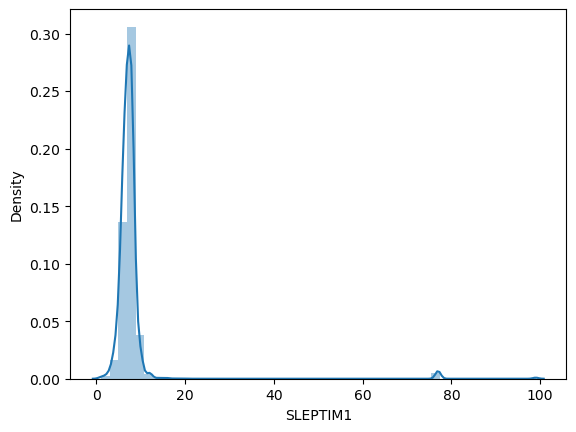

In [40]:
sns.distplot(new_df["SLEPTIM1"])
print(new_df["SLEPTIM1"].skew())
print(new_df["SLEPTIM1"].kurt())

In [41]:
new_df["SLEPTIM1"]=new_df["SLEPTIM1"].replace(np.nan,new_df["SLEPTIM1"].mean())

In [42]:
new2_df["SLEPTIM1"]=new_df["SLEPTIM1"]

In [43]:
new2_df.head()

,X_MICHD,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,ASTHMA3,X_MENT14D,CHCKDNY2,CHCSCNCR,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK,SLEPTIM1
0,0.0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,1.0,1.0,3,2.0,1.0,2,1.0,1.0,2.0,2.0,5.0
1,0.0,3.0,9,2.0,2,2.0,6,2,1.0,3.0,1.0,1.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0,7.0
2,0.0,3.0,4,2.0,2,2.0,6,2,1.0,3.0,2.0,2.0,1,2.0,2.0,1,1.0,2.0,1.0,2.0,7.0
3,0.0,3.0,4,2.0,2,2.0,6,1,2.0,1.0,2.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0,6.0
4,0.0,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0,7.0


In [44]:
new2_df.shape

(401958, 21)

In [45]:
new2_df.isna().sum()

X_MICHD      0
X_BMI5CAT    0
X_SMOKER3    0
CVDSTRK3     0
SEXVAR       0
CVDINFR4     0
X_AGE_G      0
X_IMPRACE    0
EXERANY2     0
GENHLTH      0
ADDEPEV3     0
ASTHMA3      0
X_MENT14D    0
CHCKDNY2     0
CHCSCNCR     0
X_PHYS14D    0
CHCOCNCR     0
CHCCOPD2     0
MARITAL      0
DIFFWALK     0
SLEPTIM1     0
dtype: int64

#Balancing data set usng Random over sampling

In [48]:
X=new2_df.drop('X_MICHD',axis=1)
Y=new2_df['X_MICHD']

In [49]:
from imblearn.over_sampling import RandomOverSampler
os1 = RandomOverSampler()
X_res,y_res=os1.fit_resample(X, Y)

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_res,y_res)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.sort_values(by='Score',ascending=[False])

,Specs,Score
5,X_AGE_G,55622.406364
8,GENHLTH,53993.902308
4,CVDINFR4,41978.070484
14,X_PHYS14D,25721.113967
19,SLEPTIM1,7559.681995
17,MARITAL,5727.536033
18,DIFFWALK,5511.133361
1,X_SMOKER3,4118.524047
6,X_IMPRACE,3830.520074
7,EXERANY2,3284.982898


In [51]:
print(featureScores.nlargest(15,'Score'))

        Specs         Score
5     X_AGE_G  55622.406364
8     GENHLTH  53993.902308
4    CVDINFR4  41978.070484
14  X_PHYS14D  25721.113967
19   SLEPTIM1   7559.681995
17    MARITAL   5727.536033
18   DIFFWALK   5511.133361
1   X_SMOKER3   4118.524047
6   X_IMPRACE   3830.520074
7    EXERANY2   3284.982898
16   CHCCOPD2   2120.520412
3      SEXVAR   1829.737891
2    CVDSTRK3   1352.446416
0   X_BMI5CAT   1171.704107
13   CHCSCNCR    877.384135


In [52]:
X_res = X_res[['X_BMI5CAT','X_SMOKER3','CVDSTRK3','SEXVAR','CVDINFR4'
            ,'X_AGE_G','X_IMPRACE','EXERANY2','GENHLTH',
             'CHCKDNY2','X_PHYS14D','CHCOCNCR','CHCCOPD2','MARITAL','DIFFWALK']]
X_res.head()

,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,CHCKDNY2,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,2.0,2,1.0,1.0,2.0,2.0
1,3.0,9,2.0,2,2.0,6,2,1.0,3.0,2.0,1,2.0,2.0,3.0,2.0
2,3.0,4,2.0,2,2.0,6,2,1.0,3.0,2.0,1,1.0,2.0,1.0,2.0
3,3.0,4,2.0,2,2.0,6,1,2.0,1.0,2.0,1,2.0,2.0,3.0,2.0
4,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,1,2.0,2.0,3.0,2.0


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=0)

In [54]:
X_train.head()

,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,CHCKDNY2,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
108792,3.0,3,2.0,2,2.0,5,1,2.0,3.0,2.0,2,2.0,2.0,1.0,2.0
250338,3.0,4,2.0,1,2.0,2,4,1.0,3.0,2.0,1,2.0,2.0,5.0,2.0
170857,4.0,4,2.0,1,2.0,6,1,2.0,3.0,7.0,1,2.0,2.0,1.0,2.0
725015,4.0,2,2.0,1,2.0,5,1,1.0,3.0,2.0,1,1.0,1.0,1.0,2.0
511603,4.0,1,2.0,2,1.0,6,1,2.0,4.0,1.0,3,2.0,2.0,4.0,1.0


In [55]:
X_test.head()

,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,CHCKDNY2,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
531629,3.0,4,2.0,1,1.0,6,5,1.0,3.0,2.0,1,2.0,2.0,1.0,2.0
32259,2.0,4,2.0,1,2.0,1,6,1.0,2.0,2.0,1,2.0,2.0,5.0,2.0
135309,3.0,3,2.0,2,2.0,6,1,1.0,4.0,2.0,3,2.0,7.0,3.0,1.0
558030,2.0,1,2.0,1,2.0,4,1,1.0,3.0,2.0,1,2.0,2.0,1.0,2.0
323548,3.0,3,1.0,2,2.0,6,1,1.0,4.0,2.0,1,2.0,2.0,3.0,2.0


In [56]:
y_train.head()

108792    0.0
250338    0.0
170857    0.0
725015    1.0
511603    1.0
Name: X_MICHD, dtype: float64

In [57]:
y_test.head()

531629    1.0
32259     0.0
135309    0.0
558030    1.0
323548    1.0
Name: X_MICHD, dtype: float64

# 1. Logistic regression

In [58]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [59]:
log_pred=logr.predict(X_test)

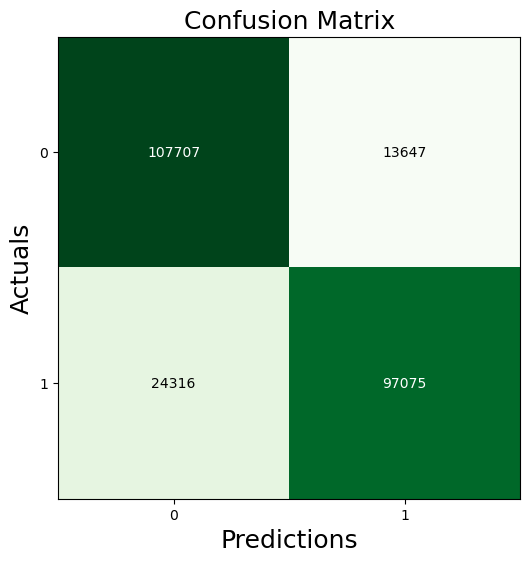

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, log_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_pred)

0.8436095491153268

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85    121354
         1.0       0.88      0.80      0.84    121391

    accuracy                           0.84    242745
   macro avg       0.85      0.84      0.84    242745
weighted avg       0.85      0.84      0.84    242745



# 2. Discision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [64]:
decision_pred=classifier.predict(X_test)

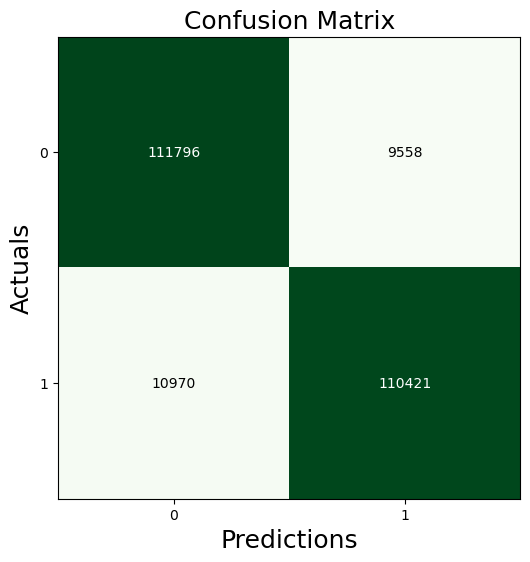

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, decision_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,decision_pred)

0.9154338915322664

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,decision_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92    121354
         1.0       0.92      0.91      0.91    121391

    accuracy                           0.92    242745
   macro avg       0.92      0.92      0.92    242745
weighted avg       0.92      0.92      0.92    242745



# 3. random forest

In [68]:
from sklearn.ensemble import RandomForestClassifier  
random_classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
random_classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [69]:
random_pred=random_classifier.predict(X_test)

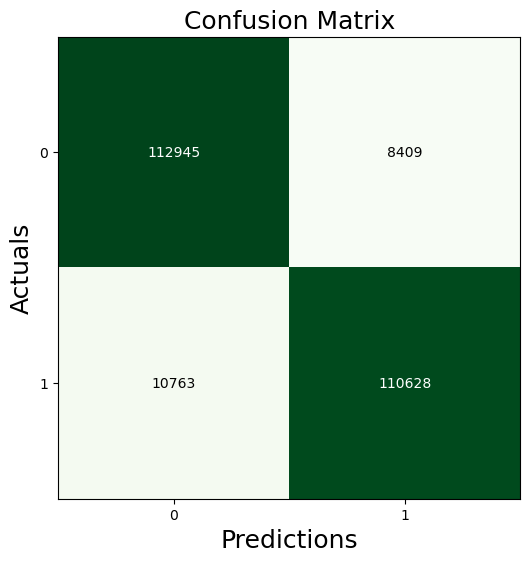

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, random_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,random_pred)

0.921020000411955

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,random_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92    121354
         1.0       0.93      0.91      0.92    121391

    accuracy                           0.92    242745
   macro avg       0.92      0.92      0.92    242745
weighted avg       0.92      0.92      0.92    242745



# 4. support vector machine

In [73]:
#from sklearn.svm import SVC # "Support vector classifier"  
#svm_classifier = SVC(kernel='linear', random_state=0)  
#svm_classifier.fit(X_train, y_train) 

# 5. naive based algorithm

In [74]:
from sklearn.naive_bayes import GaussianNB  
NB_classifier = GaussianNB()  
NB_classifier.fit(X_train, y_train)  

GaussianNB()

In [75]:
NB_pred=classifier.predict(X_test)

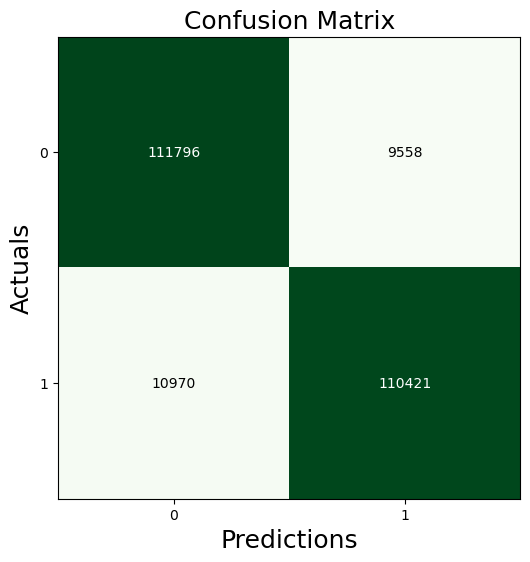

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, NB_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92    121354
         1.0       0.92      0.91      0.91    121391

    accuracy                           0.92    242745
   macro avg       0.92      0.92      0.92    242745
weighted avg       0.92      0.92      0.92    242745



# 6. XGBClassifier

In [78]:
XGB_classifier= XGBClassifier()  
XGB_classifier.fit(X_train , y_train)  
  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [79]:
XGB_pred=XGB_classifier.predict(X_test)

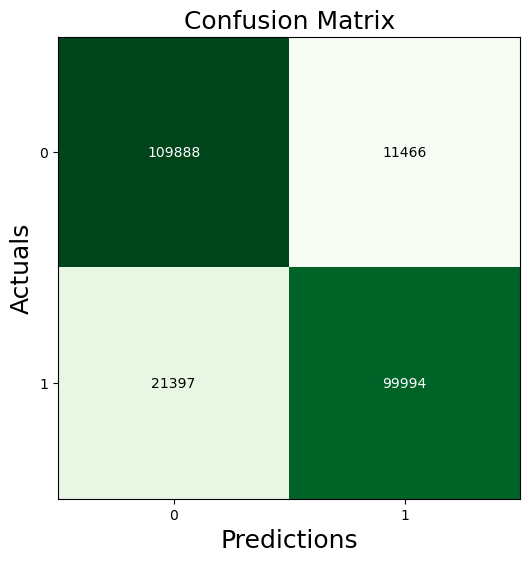

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, XGB_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,XGB_pred)

0.8646192506539785

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,XGB_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87    121354
         1.0       0.90      0.82      0.86    121391

    accuracy                           0.86    242745
   macro avg       0.87      0.86      0.86    242745
weighted avg       0.87      0.86      0.86    242745



#PICKLING MODEL FILE

In [85]:
import pickle
pickle.dump(XGB_classifier,open('random_classifier','wb'))

In [ ]:
import os
os.getcwd()